In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from celluloid import Camera

In [19]:
df_multy = pd.read_csv("results_multithreaded.csv", sep=',')
df_multy.columns = ['n', 'x1', 'x2', 'y', 'f1', 'f2', 'Ax', 'Ay', 'Bx', 'By', 'C', 'time']
df_multy.head()

,n,x1,x2,y,f1,f2,Ax,Ay,Bx,By,C,time
0,0,-0.169178,0.166025,0.205537,2.053559,2.016281,-0.353,0.300000,0.353,0.300000,1.178097,0.0
1,1,-0.166853,0.166810,0.207696,2.031790,2.030676,-0.353,0.300000,0.353,0.300000,1.178097,24434.0
2,2,-0.167690,0.167722,0.207131,2.033958,2.034227,-0.353,0.299670,0.353,0.299670,1.178097,23342.0
3,3,-0.168802,0.168843,0.206243,2.037320,2.037697,-0.353,0.299008,0.353,0.299008,1.178097,23167.0
4,4,-0.170426,0.170486,0.204939,2.042228,2.042795,-0.353,0.298017,0.353,0.298017,1.178097,23534.0


In [20]:
def add_time_sum_col(df):
    time_s = np.array(df[['time']])
    time_sum = []
    current_sum=0
    for k in time_s:
        time_sum.append(k+current_sum)
        current_sum+=k
        df1 = pd.DataFrame(time_sum)
        df1.columns = ['time_sum']
        df2 = df.join(df1)
    return df2

In [21]:
df_multy = add_time_sum_col(df_multy)
df_multy

,n,x1,x2,y,f1,f2,Ax,Ay,Bx,By,C,time,time_sum
0,0,-0.169178,0.166025,0.205537,2.053559,2.016281,-0.353,0.300000,0.353,0.300000,1.178097,0.0,0.0
1,1,-0.166853,0.166810,0.207696,2.031790,2.030676,-0.353,0.300000,0.353,0.300000,1.178097,24434.0,24434.0
2,2,-0.167690,0.167722,0.207131,2.033958,2.034227,-0.353,0.299670,0.353,0.299670,1.178097,23342.0,47776.0
3,3,-0.168802,0.168843,0.206243,2.037320,2.037697,-0.353,0.299008,0.353,0.299008,1.178097,23167.0,70943.0
4,4,-0.170426,0.170486,0.204939,2.042228,2.042795,-0.353,0.298017,0.353,0.298017,1.178097,23534.0,94477.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,-0.201390,0.201047,0.180600,2.147129,2.143084,-0.353,0.278927,0.353,0.278927,1.178097,22257.0,5860107.0
246,246,-0.190042,0.189600,0.189471,2.107864,2.103136,-0.353,0.286329,0.353,0.286329,1.178097,22572.0,5882679.0
247,247,-0.178672,0.178205,0.198481,2.070488,2.065848,-0.353,0.293536,0.353,0.293536,1.178097,22240.0,5904919.0
248,248,-0.167337,0.166918,0.207580,2.034934,2.031105,-0.353,0.300502,0.353,0.300502,1.178097,24833.0,5929752.0


In [22]:
df_single = pd.read_csv("results_singlethreaded.csv")
df_single.columns = ['n', 'x1', 'x2', 'y', 'f1', 'f2', 'Ax', 'Ay', 'Bx', 'By', 'C', 'time']
df_single.head()

,n,x1,x2,y,f1,f2,Ax,Ay,Bx,By,C,time
0,0,-0.169178,0.166025,0.205537,2.053559,2.016281,-0.353,0.300000,0.353,0.300000,1.178097,0.0
1,1,-0.166853,0.166810,0.207696,2.031790,2.030676,-0.353,0.300000,0.353,0.300000,1.178097,1320.0
2,2,-0.167690,0.167722,0.207131,2.033958,2.034227,-0.353,0.299670,0.353,0.299670,1.178097,1087.0
3,3,-0.168802,0.168843,0.206243,2.037320,2.037697,-0.353,0.299008,0.353,0.299008,1.178097,1081.0
4,4,-0.170426,0.170486,0.204939,2.042228,2.042795,-0.353,0.298017,0.353,0.298017,1.178097,1137.0


In [23]:
df_single = add_time_sum_col(df_single)
df_single

,n,x1,x2,y,f1,f2,Ax,Ay,Bx,By,C,time,time_sum
0,0,-0.169178,0.166025,0.205537,2.053559,2.016281,-0.353,0.300000,0.353,0.300000,1.178097,0.0,0.0
1,1,-0.166853,0.166810,0.207696,2.031790,2.030676,-0.353,0.300000,0.353,0.300000,1.178097,1320.0,1320.0
2,2,-0.167690,0.167722,0.207131,2.033958,2.034227,-0.353,0.299670,0.353,0.299670,1.178097,1087.0,2407.0
3,3,-0.168802,0.168843,0.206243,2.037320,2.037697,-0.353,0.299008,0.353,0.299008,1.178097,1081.0,3488.0
4,4,-0.170426,0.170486,0.204939,2.042228,2.042795,-0.353,0.298017,0.353,0.298017,1.178097,1137.0,4625.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,-0.201390,0.201047,0.180600,2.147129,2.143084,-0.353,0.278927,0.353,0.278927,1.178097,1060.0,255545.0
246,246,-0.190042,0.189600,0.189471,2.107864,2.103136,-0.353,0.286329,0.353,0.286329,1.178097,1190.0,256735.0
247,247,-0.178672,0.178205,0.198481,2.070488,2.065848,-0.353,0.293536,0.353,0.293536,1.178097,1068.0,257803.0
248,248,-0.167337,0.166918,0.207580,2.034934,2.031105,-0.353,0.300502,0.353,0.300502,1.178097,1093.0,258896.0


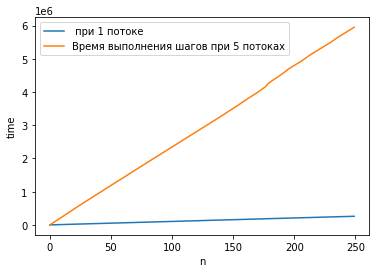

In [28]:
sns.lineplot(data=df_single, x="n", y="time_sum", label=' при 1 потоке').set(ylabel='time') 
sns.lineplot(data=df_multy, x="n", y="time_sum", label='Время выполнения шагов при 5 потоках').set(ylabel='time') 
plt.legend()
plt.show()

In [29]:
df_multy['speed_up'] = df_single['time_sum'] / df_multy['time_sum']
df_multy

,n,x1,x2,y,f1,f2,Ax,Ay,Bx,By,C,time,time_sum,speed_up
0,0,-0.169178,0.166025,0.205537,2.053559,2.016281,-0.353,0.300000,0.353,0.300000,1.178097,0.0,0.0,NaN
1,1,-0.166853,0.166810,0.207696,2.031790,2.030676,-0.353,0.300000,0.353,0.300000,1.178097,24434.0,24434.0,0.054023
2,2,-0.167690,0.167722,0.207131,2.033958,2.034227,-0.353,0.299670,0.353,0.299670,1.178097,23342.0,47776.0,0.050381
3,3,-0.168802,0.168843,0.206243,2.037320,2.037697,-0.353,0.299008,0.353,0.299008,1.178097,23167.0,70943.0,0.049166
4,4,-0.170426,0.170486,0.204939,2.042228,2.042795,-0.353,0.298017,0.353,0.298017,1.178097,23534.0,94477.0,0.048954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,-0.201390,0.201047,0.180600,2.147129,2.143084,-0.353,0.278927,0.353,0.278927,1.178097,22257.0,5860107.0,0.043608
246,246,-0.190042,0.189600,0.189471,2.107864,2.103136,-0.353,0.286329,0.353,0.286329,1.178097,22572.0,5882679.0,0.043643
247,247,-0.178672,0.178205,0.198481,2.070488,2.065848,-0.353,0.293536,0.353,0.293536,1.178097,22240.0,5904919.0,0.043659
248,248,-0.167337,0.166918,0.207580,2.034934,2.031105,-0.353,0.300502,0.353,0.300502,1.178097,24833.0,5929752.0,0.043661


[Text(0, 0.5, 'speed up'), Text(0.5, 1.0, 'Ускорение')]

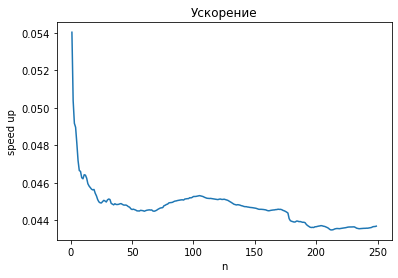

In [31]:
sns.lineplot(data=df_multy, x="n", y="speed_up").set(title='Ускорение', ylabel='speed up') 

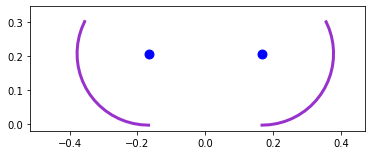

In [18]:
camera = Camera(plt.figure())
for step in range(250):
    ax = plt.gca().set_aspect('equal')
    plt.scatter(x=[df_multy.x1[step], df_multy.x2[step]], y=[df_multy.y[step], df_multy.y[step]], c='b', s=80)
    radius = ((df_multy.x1[step] - df_multy.Ax[step])**2 + (df_multy.y[step] - df_multy.Ay[step])**2) ** 0.5
    
    arc_angles = np.linspace(-np.pi/2-df_multy.f1[step], -np.pi/2, 20)
    arc_xs = radius * np.cos(arc_angles) + df_multy.x1[step]
    arc_ys = radius * np.sin(arc_angles) + df_multy.y[step]
    plt.plot(arc_xs, arc_ys, color = 'darkorchid', lw = 3)
    
    arc_angles = np.linspace(-np.pi/2, -np.pi/2 + df_multy.f2[step], 20)
    arc_xs = radius * np.cos(arc_angles) + df_multy.x2[step]
    arc_ys = radius * np.sin(arc_angles) + df_multy.y[step]
    plt.plot(arc_xs, arc_ys, color = 'darkorchid', lw = 3)
    camera.snap()
anim = camera.animate(blit=True)
anim.save('scatter.mp4', writer = 'ffmpeg')